<h2>TRAIN.CSV</h2>

<h4>14993 linhas e 24 colunas</h4>

<h3>Data Fields</h3>
<p><b>PetID -</b> Unique hash ID of pet profile</p>
<p><b>AdoptionSpeed -</b> Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.</p>
<hr>

<p style="color:blue;"><b>0 </b> Pet was adopted on the same day as it was listed</p> 
<p style="color:blue;"><b>1 </b> Pet was adopted between 1 and 7 days (1st week) after being listed</p> 
<p style="color:blue;"><b>2 </b> Pet was adopted between 8 and 30 days (1st month) after being listed</p> 
<p style="color:blue;"><b>3 </b> Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed</p> 
<p style="color:blue;"><b>4 </b> No adoption after 100 days of being listed</p> 

<p><b>(There are no pets in this dataset that waited between 90 and 100 days)</b></p>
    
<hr>
<p><b>Type -</b> Type of animal (1 = Dog, 2 = Cat)</p>
<p><b>Name -</b> Name of pet (Empty if not named)</p>
<p><b>Age -</b> Age of pet when listed, in months</p>
<p><b>Breed1 -</b> Primary breed of pet (Refer to BreedLabels dictionary)</p>
<p><b>Breed2 -</b> Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)</p>
<p><b>Gender -</b> Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)</p>
<p><b>Color1 -</b> Color 1 of pet (1- Black; 2- Brown; 3-Golden...) (Refer to ColorLabels dictionary)</p>
<p><b>Color2 -</b> Color 2 of pet (Refer to ColorLabels dictionary)</p>
<p><b>Color3 -</b> Color 3 of pet (Refer to ColorLabels dictionary)</p>
<p><b>MaturitySize -</b> Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)</p>
<p><b>FurLength -</b> Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)</p>
<p><b>Vaccinated -</b> Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)</p>
<p><b>Dewormed -</b> Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)</p>
<p><b>Sterilized -</b> Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)</p>
<p><b>Health -</b> Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)</p>
<p><b>Quantity -</b> Number of pets represented in profile</p>
<p><b>Fee -</b> Adoption fee (0 = Free)</p>
<p><b>State -</b> State location in Malaysia (Refer to StateLabels dictionary)</p>
<p><b>RescuerID -</b> Unique hash ID of rescuer</p>
<p><b>VideoAmt -</b> Total uploaded videos for this pet</p>
<p><b>PhotoAmt -</b> Total uploaded photos for this pet</p>
<p><b>Description -</b> Profile write-</b>up for this pet. The primary language used is English, with some in Malay or Chinese.</p>

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
pd.set_option("display.max_columns", 25)

In [11]:
train = pd.read_csv('datasets/train.csv', delimiter=',')
train.sample(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
13747,1,Django,6,307,0,1,3,0,0,2,1,1,1,1,1,1,150,41326,17e2ca4a70c40b1871e83b7e84490d8a,0,"Django is very healthy,playful and so handsome...",5d32494f0,2.0,4
7893,2,Tuxedo Kitten,2,266,0,1,1,7,0,2,1,2,2,2,1,1,0,41326,28f8fcf644fd0dbd7f160576547fe041,0,A cute tuxedo was abandoned in front of my hou...,edd79adb8,4.0,3
14451,2,NaN,12,285,288,2,2,5,6,3,3,1,1,2,1,1,250,41326,5040b907177d6613165a0acc18a6708c,0,she's very manja once u know her.. wanna sell ...,959064f3c,1.0,2


In [12]:
pd.options.display.max_rows

60

In [13]:
total_pets = train.shape[0]
total_pets

14993

In [14]:
#plots, mean, std, var e norm

In [15]:
# VELOCIDADE DE ADOÇÃO -----------------------------------------------------------------------------------------------------
#velocidade de adoção (0): no primeiro DIA (0)
qtd_adoption_speed_0 = train.AdoptionSpeed[train.AdoptionSpeed == 0].count()
percent_adoption_speed_0 = (qtd_adoption_speed_0 / total_pets) * 100

print('pets adotados (primeiro dia): ',qtd_adoption_speed_0)
print('%', percent_adoption_speed_0)

pets adotados (primeiro dia):  410
% 2.7346094844260658


In [16]:
# Adotados no dia 0 , cães e gatos:
train[train.AdoptionSpeed == 0].groupby(['Type']).count()[['AdoptionSpeed']]
#train.groupby('AdoptionSpeed').count()[['Type']]

,AdoptionSpeed
Type,
1,170
2,240


In [17]:
#Análise: até 12 meses a probabiidade de ser adotado é maior, principalmente até o [e especilamente no] segundo mês
train[train.AdoptionSpeed == 0].groupby(['Age']).count()[['AdoptionSpeed']]

,AdoptionSpeed
Age,
0,10
1,54
2,115
3,44
4,24
5,7
6,20
7,7
8,4


In [18]:
#Cores1 de valor 1 e 2 (black e brown) são mais adotados no dia 0
train[train.AdoptionSpeed == 0].groupby(['Color1']).count()[['AdoptionSpeed']]

,AdoptionSpeed
Color1,
1,173
2,119
3,29
4,13
5,34
6,29
7,13


In [19]:
#Cores1 de valor 1 e 2 (black e brown) são mais adotados na primeira semana (1-7 days)
train[train.AdoptionSpeed == 1].groupby(['Color1']).count()[['AdoptionSpeed']]

,AdoptionSpeed
Color1,
1,1498
2,689
3,211
4,140
5,220
6,156
7,176


In [20]:
#Cores1 de valor 1 e 2 (black e brown) são mais adotados entre 8-30 days
train[train.AdoptionSpeed == 2].groupby(['Color1']).count()[['AdoptionSpeed']]

,AdoptionSpeed
Color1,
1,2036
2,956
3,285
4,145
5,238
6,195
7,182


In [21]:
#Cores1 de valor 1 e 2 (black e brown) são mais adotados entre 31-90 days
train[train.AdoptionSpeed == 3].groupby(['Color1']).count()[['AdoptionSpeed']]

,AdoptionSpeed
Color1,
1,1633
2,854
3,184
4,145
5,185
6,133
7,125


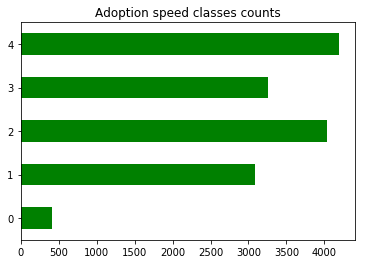

In [46]:
train['AdoptionSpeed'].value_counts().sort_index().plot('barh', color='green');
plt.title('Adoption speed classes counts');

In [ ]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='Type', title='by pet Type')

In [ ]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [22]:
#velocidade de adoção (1): no primeira SEMANA (1 - 7)
qtd_adoption_speed_1 = train.AdoptionSpeed[train.AdoptionSpeed == 1].count()
percent_adoption_speed_1 = (qtd_adoption_speed_1 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_1)
print('%', percent_adoption_speed_1)

pets adotados:  3090
% 20.609617821650104


In [23]:
#velocidade de adoção(2):  8 - 30
qtd_adoption_speed_2 = train.AdoptionSpeed[train.AdoptionSpeed == 2].count()
percent_adoption_speed_2 = (qtd_adoption_speed_2 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_2)
print('%', percent_adoption_speed_2)

pets adotados:  4037
% 26.92589875275128


In [24]:
#velocidade de adoção(3):  31 - 90
qtd_adoption_speed_3 = train.AdoptionSpeed[train.AdoptionSpeed == 3].count()
percent_adoption_speed_3 = (qtd_adoption_speed_3 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_3)
print('%', percent_adoption_speed_3)

pets adotados:  3259
% 21.736810511572067


In [48]:
#velocidade de adoção(4):  + 100
qtd_adoption_speed_4 = train.AdoptionSpeed[train.AdoptionSpeed == 4].count()
percent_adoption_speed_4 = (qtd_adoption_speed_4 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_4)
print('%', percent_adoption_speed_4)

pets adotados:  4197
% 27.99306342960048


In [54]:
train.AdoptionSpeed[train.AdoptionSpeed == 4 and train.Age > 12].count()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

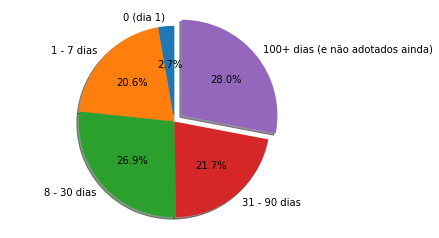

In [26]:
#GRÁFICO ADOPTION SPEED 

labels_adoption_speed = '0 (dia 1)', '1 - 7 dias','8 - 30 dias', '31 - 90 dias', '100+ dias (e não adotados ainda)' 
sizes_adoption_speed = [qtd_adoption_speed_0, qtd_adoption_speed_1, qtd_adoption_speed_2, qtd_adoption_speed_3, qtd_adoption_speed_4]
explode_adoption_speed = (0, 0, 0, 0, 0.1) 

fig_adoption_speed, ax_adoption_speed = plt.subplots()
ax_adoption_speed.pie(sizes_adoption_speed, explode=explode_adoption_speed, labels=labels_adoption_speed, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_adoption_speed.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
# QUANTIDADE DE CÃES E GATOS -------------------------------------------------------------------------------------------

In [28]:
#cães
qtd_caes = train.Type[train.Type == 1].count()
qtd_caes

8132

In [29]:
#gatos
qtd_gatos = train.Type[train.Type == 2].count()
qtd_gatos

6861

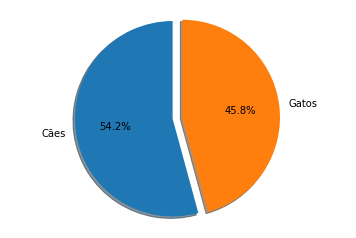

In [30]:
#GRÁFICO: CÃES E GATOS
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels2 = 'Cães', 'Gatos'
sizes2 = [qtd_caes, qtd_gatos]
explode2 = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




In [31]:
# IDADE --------------------------------------------------------------------------------------------------------
#Média de idade (meses)
media_idade_geral = train.Age.mean()
media_idade_geral

10.452077636230241

In [32]:
#Média de idade dos cães (meses)

media_idade_caes = train.Age[train.Type == 1].mean()
media_idade_caes

12.906173143138219

In [33]:
#Média de idade dos gatos (meses)
media_idade_gatos = train.Age[train.Type == 2].mean()
media_idade_gatos

7.543361026089491

In [34]:
#mais velho (anos)
pet_mais_velho = train.Age.max() / 12
pet_mais_velho

21.25

In [35]:
#mais novo (meses)
pet_mais_novo = train.Age.min() 
pet_mais_novo

0

Text(0.5, 0.98, 'Idades')

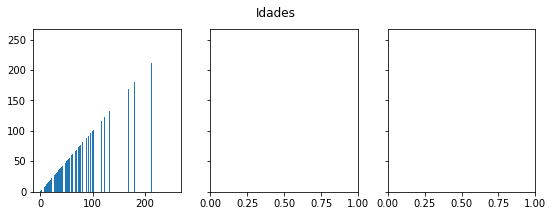

In [36]:
#GRÁFICO DE IDADES
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}

names_idades_bar = list(train.Age)
values_idades_bar = list(train.Age)

fig_idades_bar, axs_idades_bar = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs_idades_bar[0].bar(names_idades_bar, values_idades_bar)

fig_idades_bar.suptitle('Idades')

In [37]:
#GENDER ------------------------------------------------------------------------------

#macho
total_macho = train.Gender[train.Gender ==1].count()
total_macho

5536

In [38]:
#femea
total_femea = train.Gender[train.Gender ==2].count()
total_femea

7277

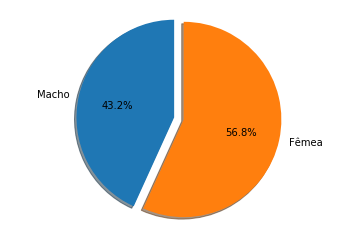

In [39]:
#GRÁFICO MACHO E FEMEA
labels_gender = 'Macho', 'Fêmea'
sizes_gender = [total_macho, total_femea]
explode_gender = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig_gender, ax_gender = plt.subplots()
ax_gender.pie(sizes_gender, explode=explode_gender, labels=labels_gender, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_gender.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




In [40]:
# FEE (TAXA DE ADOÇAÕ)--------------------------------------------------------------------------------------------------------
#grátis
qtd_fee_gratis = train.Fee[train.Fee == 0].count()
percent_fee_gratis = (qtd_fee_gratis / total_pets) * 100
print('total taxa grátis:',qtd_fee_gratis)
print('%', percent_fee_gratis)



total taxa grátis: 12663
% 84.45941439338358


In [41]:
#pago
qtd_fee_pago = train.Fee[train.Fee > 0].count()
percent_fee_pago = (qtd_fee_pago / total_pets) * 100
print('total taxa pago:',qtd_fee_pago)
print('%', percent_fee_pago)


total taxa pago: 2330
% 15.540585606616423


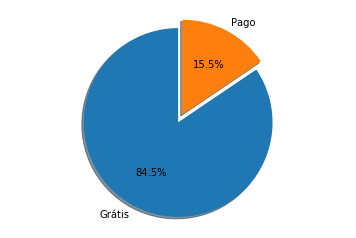

In [42]:
#GRÁFICO: PAGO E GRÁTIS
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Grátis', 'Pago'
sizes = [qtd_fee_gratis, qtd_fee_pago]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
